## EDA Code to Explore Sets

The goal here is to provide a space to explore data on different sets.

In [ ]:
import pandas as pd
from scripts.get_card_data import get_card_data

set_code = 'blb'

cards_df = get_card_data(set_code).copy()

cards_df.head(2)

Retrieved Bloomburrow data from memory.


,object,id,oracle_id,multiverse_ids,mtgo_id,arena_id,tcgplayer_id,cardmarket_id,name,lang,...,related_uris,purchase_uris,power,toughness,all_parts,security_stamp,promo_types,frame_effects,produced_mana,loyalty
0,card,7dd9946b-515e-4e0d-9da2-711e126e9fa6,7b89b7d2-c724-4d5d-9f0b-7d3302ad1168,[669036],129489.0,91658.0,559491.0,778435.0,Agate Assault,en,...,{'gatherer': 'https://gatherer.wizards.com/Pag...,{'tcgplayer': 'https://partner.tcgplayer.com/c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,39ebb84a-1c52-4b07-9bd0-b360523b3a5b,381a3e8e-71dd-48e4-ab62-53478bde4a14,[668996],129409.0,91618.0,559647.0,778511.0,Agate-Blade Assassin,en,...,{'gatherer': 'https://gatherer.wizards.com/Pag...,{'tcgplayer': 'https://partner.tcgplayer.com/c...,1,3,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
core_card_data = ["name", "mana_cost", "cmc", "type_line", "oracle_text", "colors", "color_identity", "keywords", "rarity", "power", "toughness"]
skeptical_keepers = ["reprint"] # There may be a slight bias for/against new cards vs reprints

status_and_printing = ["foil", "nonfoil", "promo", "variation", "security_stamp", "frame", "full_art", "textless"]
art_and_flavor = ["artist", "illustration_id", "flavor_text", "border_color"]
marketplace_and_pricing = ["prices", "purchase_uris", "related_uris"]

# Completely useless for all purposes
metadata_and_links = ["set", "set_name", "set_type", "set_uri", "set_search_uri", "scryfall_set_uri", "rulings_uri", "prints_search_uri", "collector_number"]
external_references = ["oracle_id", "multiverse_ids", "mtgo_id", "arena_id", "tcgplayer_id", "cardmarket_id"]

In [ ]:
bool_cols = ['is_legendary', 'has_flash', 'is_multicolor']  # Example columns
#df[bool_cols] = df[bool_cols].astype(int)


In [4]:
print(cards_df['color_identity'].value_counts())

color_identity
['U']              46
['G']              46
['R']              44
['W']              43
['B']              41
[]                 15
['R', 'U']          6
['G', 'W']          5
['B', 'R']          5
['B', 'G']          4
['G', 'U']          4
['G', 'R']          4
['B', 'W']          4
['U', 'W']          3
['R', 'W']          3
['B', 'U']          3
['G', 'R', 'W']     1
['B', 'G', 'U']     1
['G', 'U', 'W']     1
['B', 'R', 'U']     1
Name: count, dtype: int64


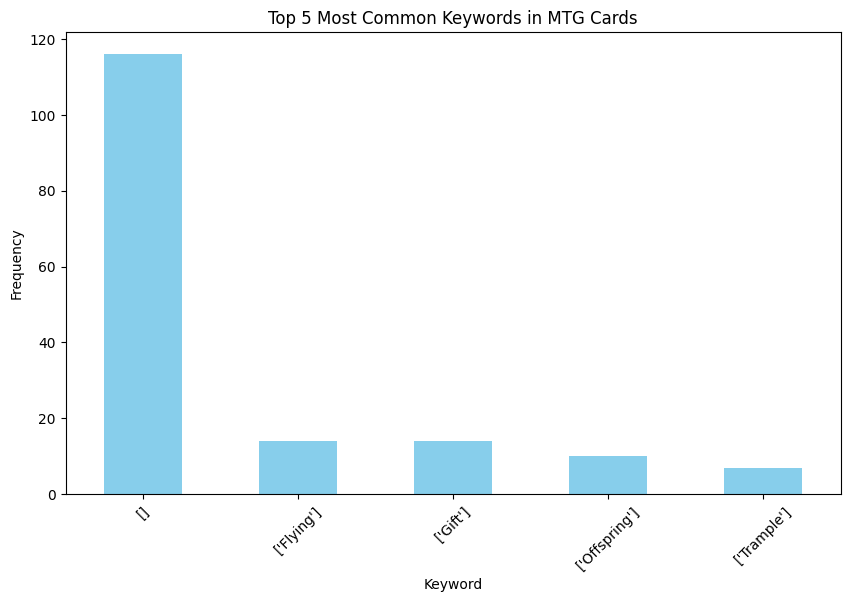

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploding keywords into individual rows, filtering out empty lists
df_exploded = cards_df.explode('keywords')
df_exploded = df_exploded[df_exploded['keywords'].notna()]

# Counting most common keywords
top_keywords = df_exploded['keywords'].value_counts().head(5)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
top_keywords.plot(kind='bar', color='skyblue')
plt.title("Top 5 Most Common Keywords in MTG Cards")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


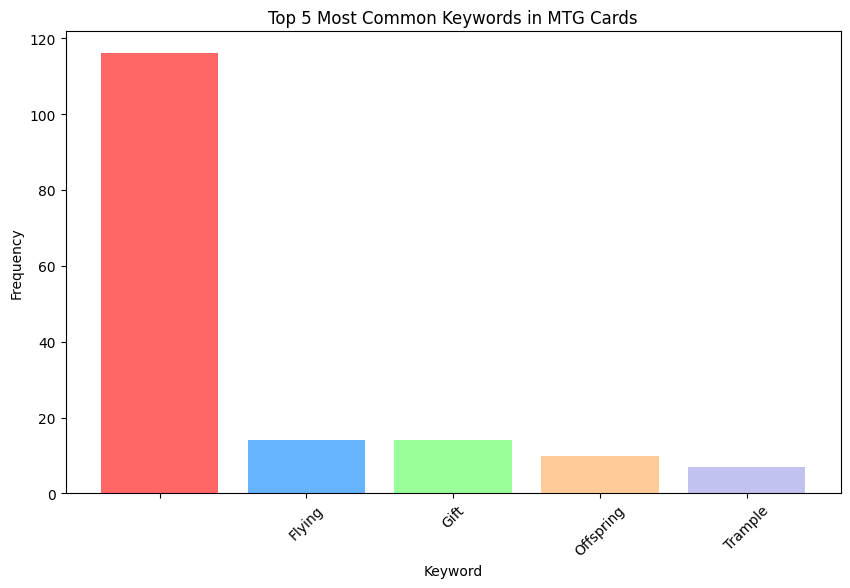

In [7]:
df_exploded = cards_df.explode('keywords')
df_exploded = df_exploded[df_exploded['keywords'].notna() & (df_exploded['keywords'] != '')]

# Counting most common keywords
top_keywords = df_exploded['keywords'].value_counts().head(5)

# Cleaning labels by removing quotes/brackets
clean_labels = [kw.replace("'", "").replace("[", "").replace("]", "") for kw in top_keywords.index]

# Plotting the bar graph with color
plt.figure(figsize=(10, 6))
colors = ['#ff6666', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Nice variety
plt.bar(clean_labels, top_keywords.values, color=colors)

plt.title("Top 5 Most Common Keywords in MTG Cards")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

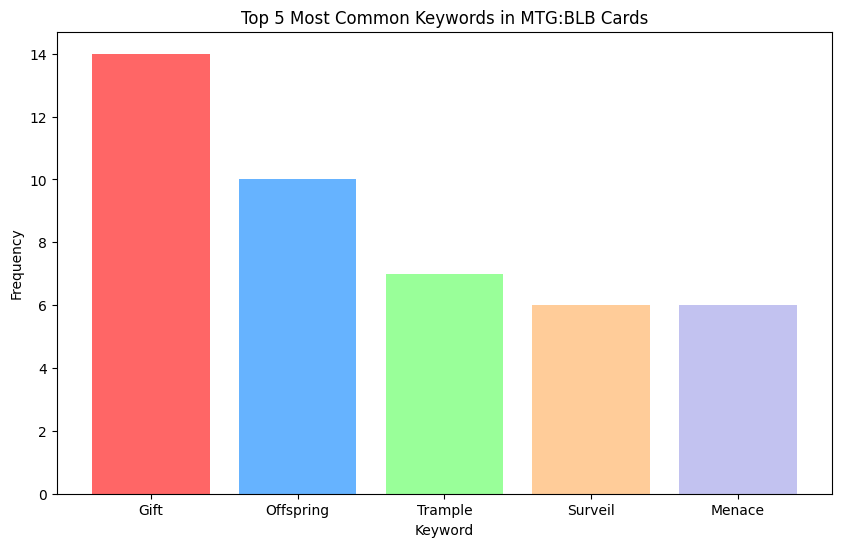

In [9]:
# Exploding keywords into individual rows
df_exploded = cards_df.explode('keywords')

# Dropping empty keywords (removes [])
df_exploded = df_exploded[df_exploded['keywords'].notna() & (df_exploded['keywords'] != '') & (df_exploded['keywords'] != '[]')]

# Counting top keywords, ignoring empty ones
top_keywords = df_exploded['keywords'].value_counts().iloc[1:6]  # Skipping the first entry ([])

# Cleaning labels for better display
clean_labels = [kw.replace("'", "").replace("[", "").replace("]", "") for kw in top_keywords.index]

# Plotting with better color differentiation
plt.figure(figsize=(10, 6))
colors = ['#ff6666', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'] 
plt.bar(clean_labels, top_keywords.values, color=colors)

plt.title(f"Top 5 Most Common Keywords in MTG:{set_code.upper()} Cards")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks()
plt.show()

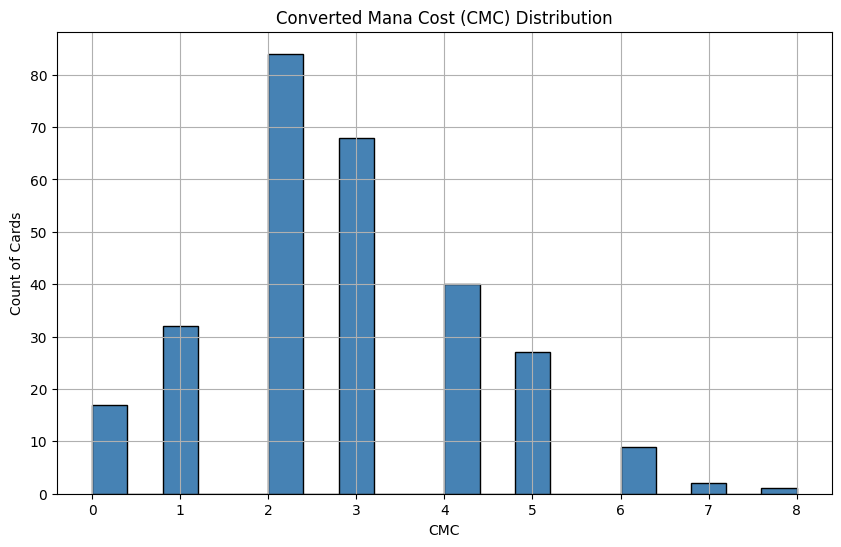

In [11]:
import matplotlib.pyplot as plt

# Plot histogram for converted mana cost (CMC)
plt.figure(figsize=(10, 6))
cards_df['cmc'].hist(bins=20, color='steelblue', edgecolor='black')

plt.title("Converted Mana Cost (CMC) Distribution")
plt.xlabel("CMC")
plt.ylabel("Count of Cards")
plt.xticks(range(int(cards_df['cmc'].max()) + 1))  # Ensure integer bin labels
plt.show()
